In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
# download nltk data
# nltk.download() 


In [2]:
# install worldcloud package
# !pip install wordcloud 

In [3]:

# extract zip folder
'''
zip_ref = zipfile.ZipFile('regulations.zip', 'r')
zip_ref.extractall('regs/')
zip_ref.close()
'''

"\nzip_ref = zipfile.ZipFile('regulations.zip', 'r')\nzip_ref.extractall('regs/')\nzip_ref.close()\n"

In [4]:
# reference from Shariyar, downloaded from D2L
"""

@author: Shariyar

"""
import xml.etree.ElementTree

def updateContent(child: xml.etree.ElementTree, content:str):
    if (child.text is not None):
        content=content+child.text+" "
    if (child.tail is not None):
        content=content+child.tail+ " "
    return content
            
    
# Funnction to parse regulations only
def parseRegulation(root: xml.etree.ElementTree):
    '''
      Parses regulation based xml file
      :param root: xml node of type xml.etree.ElementTree
      :returns dictionary of keys and values
    '''
    xRefXternal=list()
    content=""
    modifiedYear="NA"
    regYear="NA"
    consolidationYear="NA"
    #dt=""
    #modFlag=False
    xmlDict=dict()
    
    
    for child in root.iter():
        #print (child.tag,child.text,child.tail)
        if child.tag=="XRefExternal":
            txt=""
            if child.text is None:
                if child[0].tail is not None:
                    txt=child[0].tail
                else:
                     txt=child[0].text
            else:
                txt=child.text
            xRefXternal.append(txt)
            content=updateContent(child,content)
            #content+=txt+" "
       # get modifed date 
        elif ("ModifiedDate" in child.tag):
         
            dateTag=child[0]
            #print(date[1].text)
            modifiedYear=dateTag[0].text
        elif (child.tag=="RegistrationDate"):
            dateTag=child[0]
            #print(date[1].text)
            regYear=dateTag[0].text
        elif (child.tag=="ConsolidationDate"):
            dateTag=child[0]
            #print(date[1].text)
            consolidationYear=dateTag[0].text 
        elif (child.tag=="InstrumentNumber"):
            xmlDict["instrumentNumber"]=child.text
        elif (child.tag=="ShortTitle"):
            xmlDict["shorttitle"]=child.text
        elif (child.tag=="RegulationMaker"):
            xmlDict["regulationmaker"]=child.text
        elif (child.tag=="LongTitle"):
            xmlDict["longtitle"]=child.text 
            content+=child.text+". "
        elif (child.tag=="TitleText"):
            if child.text is None:
                if len(child)>0  and child[0].text is not None:
                    content+=child[0].text+". "
            else:
                content+=child.text+". "
       
            
        elif child.tag=="MM" or child.tag=="DD" or child.tag=="YYYY"  or child.tag=="Label":
            continue;
        elif child.tag=="Repealed":
            #print (child.text)
            return None # igonre reglations with repeal keywords
            
        else:
            content=updateContent(child,content)
            #print(child.tag,child.text)
            '''if (child.text is not None):
            
                content=content+child.text+" "
            if (child.tail is not None):
                content=content+child.tail+ " "'''
                
           
    xmlDict["modifiedyear"]=modifiedYear
    xmlDict["registrationyear"]=regYear
    xmlDict["consolidationyear"]=consolidationYear
    xmlDict["xrefxternal"]=xRefXternal
    xmlDict["content"]=content
    
    
    return (xmlDict)
        
##################
#    Acts Parser
#################        

def parseAct(root: xml.etree.ElementTree):
    '''
      Parses regulation based xml file
      :param root: xml node of type xml.etree.ElementTree
      : returns dictionary of keys and values
    '''
    xRefXternal=list()
    xRefInternal=list()
    content=""
    regYear="NA"
    consolidationYear="NA"
    regnalYears="NA"
     
    #dt=""
    #modFlag=False
    xmlDict=dict()
    
    
    for child in root.iter():
        #print (child.tag,child.get("stage"))
        if child.tag=="XRefExternal":
            txt=""
            if child.text is None:
                if child[0].tail is not None:
                    txt=child[0].tail
                else:
                     txt=child[0].text
            else:
                txt=child.text
            xRefXternal.append(txt)
            content+=txt+" "
            content=updateContent(child,content)
       # get modifed date 
       
        elif ("Stages"==child.tag and child.get("stage")=="assented-to"):
            
            dateTag=child[0]
            #print(date[1].text)
            regYear=dateTag[0].text
        elif (child.tag=="Stages" and child.get("stage")=="consolidation"):
            dateTag=child[0]
            #print(date[1].text)
            consolidationYear=dateTag[0].text
        elif (child.tag=="RegnalYear"):
            regnalYears=child.text
        elif (child.tag=="ConsolidatedNumber"):
            xmlDict["ConsolidatedNumber"]=child.text
        elif (child.tag=="ShortTitle"):
            xmlDict["shorttitle"]=child.text
        elif (child.tag=="RunningHead"):
            xmlDict["runninghead"]=child.text
        elif (child.tag=="ConsolidatedNumber"):
            xmlDict["consolidatednumber"]=child.text
        elif (child.tag=="AnnualStatuteNumber"):
            xmlDict["annualstatutenumber"]=child.text
        elif (child.tag=="XRefInternal"):
            xRefInternal.append(child.text)
        elif (child.tag=="LongTitle"):
            if (child.text is not None): # funny sometimes there are two long titles 
                xmlDict["longtitle"]=child.text 
                content+=child.text+". "
        elif (child.tag=="TitleText"):
            if child.text is None:
                if len(child)>0  and child[0].text is not None:
                    content+=child[0].text+". "
            else:
                content+=child.text+". "
       
       
            
        elif child.tag=="MM" or child.tag=="DD" or child.tag=="YYYY"  or child.tag=="Label":
            continue;
        elif child.tag=="Repealed":
            #print (child.text)
            return None # igonre reglations with repeal keywords
            
            
        else:
            #print(child.tag,child.text)
            content=updateContent(child,content)
            '''if (child.text is not None):
            
                content=content+child.text+" "
            if (child.tail is not None):
                content=content+child.tail+ " "'''
                
    
    
    xmlDict["registrationyear"]=regYear
    xmlDict["consolidationyear"]=consolidationYear
    xmlDict["regnalyears"]=regnalYears
    xmlDict["xrefxternal"]=xRefXternal
    xmlDict["xrefinternal"]=xRefInternal
    xmlDict["content"]=content
    
    
    return (xmlDict)
        
        
        
# Unit test: usage method
import os
import xml.etree.ElementTree as ET
directory="regs/"
#directory="..somepaths/acts"
reg_list=[]
count=0
n=0
for filename in os.listdir(directory):
    if filename.endswith(".xml") and (not filename.startswith("SI-") ):
                                      #and filename=="C.R.C.,_c._971.xml"):
        #print (filename)
        path=os.path.join(directory, filename)
        tree=ET.parse(path)
        d=parseRegulation(tree.getroot())
        if (d!=None):
            reg_list.append(d)
            n=n+1


In [5]:
# check the catregories in each regulation
reg_list[0].keys()

dict_keys(['instrumentNumber', 'shorttitle', 'longtitle', 'modifiedyear', 'registrationyear', 'consolidationyear', 'xrefxternal', 'content'])

In [6]:
len(reg_list)

2062

In [7]:
# overview of one regulation
reg_list[0]

{'instrumentNumber': 'C.R.C., c. 10',
 'shorttitle': 'Flying Accidents Compensation Regulations',
 'longtitle': 'Regulations Prescribing Compensation for Bodily Injury or Death Resulting from Flights Undertaken in the Course of Duty',
 'modifiedyear': '2005',
 'registrationyear': 'NA',
 'consolidationyear': '2018',
 'xrefxternal': ['AERONAUTICS ACT',
  'Flying Accidents Compensation Regulations',
  'Pension Act',
  'Royal Canadian Mounted Police Superannuation Act',
  'Pension Act',
  'Government Employees Compensation Act'],
 'content': 'AERONAUTICS ACT Regulations Prescribing Compensation for Bodily Injury or Death Resulting from Flights Undertaken in the Course of Duty. Short Title. These Regulations may be cited as the  Flying Accidents Compensation Regulations . Interpretation. In these Regulations, aircraft  means any machine used or designed for navigation of the air but does not include a machine designed to derive support in the atmosphere from reaction against the earth’s sur

In [8]:
# get the content only from each regulation
content_list =[]
for i in range (len(reg_list)):
    content_list.append(reg_list[i]["content"])
len(content_list)

2062

In [9]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
# reference code from Lab 9
# in order to have correct lemma of a word, we also need to determine the part-of-speech tag of it.
# for example, the word saw as noun and as verb have different lemmas (root word) and of course they have different meanings.
def myTokenizer(text):
    # use wordnetlemmatizer to lemmatize of words
    lemmatizer = WordNetLemmatizer()
    lemmas=[]
    
    for sent in nltk.sent_tokenize(text):
        #nltk return the tag from Penntreebank tagsets
        sentTag=nltk.pos_tag(nltk.word_tokenize(sent))
        for word, tag in sentTag:
          # convert Penntreebank tags to Wordnet tags
            wordNetTag=getWordnetPos(tag)
            if wordNetTag is None:
                continue
            else:
                lemmas.append(lemmatizer.lemmatize(word,wordNetTag))
    # returns a list of words and POS tags
    return  lemmas
    
    
# Function to convert Penntreebank tags to wordnet tags
def getWordnetPos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None      

In [10]:
# create custom english stop words list, punctuations, and special characters
stopWords=nltk.corpus.stopwords.words('english')
stopWords+=["''", "'s", "...", "``","--","*","-","/","=",",","”","“","’","‘"]
stopWords+=list(string.punctuation)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# create document term matrix using countvectorizer for all regulations
# get rid of the features occured more than 7000 times, and less than 10 times, and select top 10000 frequent words
# use regular expression to keep words with at least 3 letters
vect = CountVectorizer(max_features=10000, max_df=.70, min_df = 10,lowercase = True,
                       tokenizer=myTokenizer, token_pattern = r'\b[a-zA-Z]{3,}\b',stop_words=stopWords)
# create document term matrix
X = vect.fit_transform(content_list)
print (X.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'re", "'ve", 'far', "n't", 'need', 'sha'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(2062, 4290)


In [12]:
from sklearn.decomposition import LatentDirichletAllocation
# total words in the training data
vocabulary=X.shape[1] 
# run lda model with 40,60,80,and 100 number of topics for evaluation part
topics1=40
topics2=60
topics3=80
topics4=100
#alpha for LDA
alpha1=(1/topics1) 
alpha2=(1/topics2) 
alpha3=(1/topics3) 
alpha4=(1/topics4) 
# beta for LDA
beta=(1/vocabulary)

lda1 = LatentDirichletAllocation(n_components=topics1, learning_method="batch",
max_iter=20, random_state=0, topic_word_prior=beta ,doc_topic_prior=alpha1)
lda2 = LatentDirichletAllocation(n_components=topics2, learning_method="batch",
max_iter=20, random_state=0, topic_word_prior=beta ,doc_topic_prior=alpha2)
lda3 = LatentDirichletAllocation(n_components=topics3, learning_method="batch",
max_iter=20, random_state=0, topic_word_prior=beta ,doc_topic_prior=alpha3)
lda4 = LatentDirichletAllocation(n_components=topics4, learning_method="batch",
max_iter=20, random_state=0, topic_word_prior=beta ,doc_topic_prior=alpha4)

# tran each model with regulations
lda1.fit_transform(X)
lda2.fit_transform(X)
lda3.fit_transform(X)
lda4.fit_transform(X)


array([[2.50626566e-05, 2.50626566e-05, 2.50626566e-05, ...,
        2.50626566e-05, 2.50626566e-05, 2.50626566e-05],
       [7.35294118e-05, 7.35294118e-05, 7.35294118e-05, ...,
        7.35294118e-05, 7.35294118e-05, 1.45909965e-02],
       [1.81818182e-05, 1.81818182e-05, 1.81818182e-05, ...,
        1.81818182e-05, 1.81818182e-05, 1.81818182e-05],
       ...,
       [3.96825397e-05, 2.95203795e-01, 3.96825397e-05, ...,
        3.96825397e-05, 3.96825397e-05, 3.96825397e-05],
       [4.23728814e-05, 5.91430722e-02, 4.23728814e-05, ...,
        4.23728814e-05, 4.23728814e-05, 4.23728814e-05],
       [8.47457627e-05, 1.30847877e-01, 8.47457627e-05, ...,
        8.47457627e-05, 8.47457627e-05, 8.47457627e-05]])

In [13]:
perplexity=[]
log_likelihood=[]
# evaluation:
print("Evaluation with 40 Topics: ")
# find out log likelihood of the model with 40 topics
print("Log Likelihood: ", lda1.score(X))
log_likelihood.append(lda1.score(X))
# find out perplexity of the model with 40 topics
print("Perplexity: ", lda1.perplexity(X))
perplexity.append(lda1.perplexity(X))

Evaluation with 40 Topics: 
Log Likelihood:  -9849719.625025706
Perplexity:  454.2586578239946


In [14]:
print("Evaluation with 60 Topics: ")
# find out log likelihood of the model with 60 topics
print("Log Likelihood: ", lda2.score(X))
log_likelihood.append(lda2.score(X))
# find out perplexity of the model with 60 topics
print("Perplexity: ", lda2.perplexity(X))
perplexity.append(lda2.perplexity(X))

Evaluation with 60 Topics: 
Log Likelihood:  -9712966.016005727
Perplexity:  417.2623389160646


In [15]:
print("Evaluation with 80 Topics: ")
# find out log likelihood of the model with 80 topics
print("Log Likelihood: ", lda3.score(X))
log_likelihood.append(lda3.score(X))
# find out perplexity of the model with 80 topics
print("Perplexity: ", lda3.perplexity(X))
perplexity.append(lda3.perplexity(X))

Evaluation with 80 Topics: 
Log Likelihood:  -9633737.460004382
Perplexity:  397.22313937834093


In [16]:
print("Evaluation with 100 Topics: ")
# find out log likelihood of the model with 100 topics
print("Log Likelihood: ", lda4.score(X))
log_likelihood.append(lda4.score(X))
# find out perplexity of the model with 100 topics
print("Perplexity: ", lda4.perplexity(X))
perplexity.append(lda4.perplexity(X))

Evaluation with 100 Topics: 
Log Likelihood:  -9590660.16774389
Perplexity:  386.73452711779817


In [17]:
# the model with 60 topic is the best since it has the lowest perplexity before the changes flattern out, we use that model for the remainng work except evaluation
documentTopics = lda2.fit_transform(X)

In [18]:
# reference code from lab 9
topicwords=[]
# store all words in decending order : use for wordcloud
topicword_full=[]
feature_names=vect.get_feature_names()
# top 10 words
topWords=-11 
# Go through the topic-word matrix
for topicIdx, topic in enumerate(lda2.components_):
    print ("Topic ",  topicIdx)
    #Get top 10 words
    # -1 means sort in descending order
    topicwords.append (",".join([feature_names[i]  for i in topic.argsort()[:topWords:-1]]))
    # all words in decending order
    topicword_full.append(",".join([feature_names[i] for i in topic.argsort()[::-1]]))
    print (",".join([feature_names[i]  for i in topic.argsort()[:topWords:-1]]))

Topic  0
loan,amount,agreement,cost,board,veteran,interest,director,respect,rate
Topic  1
force,come,s.c.,s.,day,subsection,good,b,register,purpose
Topic  2
system,installation,fire,platform,space,equipment,area,mean,standard,production
Topic  3
b,type,column,c,failure,violation,set,item,prescribed,provision
Topic  4
explosive,unit,storage,use,licence,store,person,site,magazine,certificate
Topic  5
subsection,latitude,longitude,thence,north,west,point,area,marine,x
Topic  6
diving,operation,dive,use,person,diver,supervisor,certificate,safety,category
Topic  7
free,item,tariff,january,part,good,—,article,schedule,following
Topic  8
vehicle,engine,emission,year,model,subsection,class,standard,company,case
Topic  9
person,security,property,designated,resolution,canadian,mean,date,prohibit,paragraph
Topic  10
southern,northern,western,eastern,concession,boundary,road,front,southeastern,northwestern
Topic  11
application,land,territory,indian,lease,northwest,subsection,area,order,respect
To

In [19]:
# find out each document's topic 
regulation_topic=[]
for i in range (len(documentTopics)):
    # the topic with the highest probability in each regulation belongs to the regulation
    regulation_topic.append(np.argmax(documentTopics[i]))
# peview the first 10 regulation's topic
regulation_topic[:10]

[31, 34, 53, 23, 39, 31, 31, 56, 39, 53]

In [20]:
# get document id and each document's max probabily of being the topic
reg_id =[]
doc_topic_prob=[]
for i in range (len(documentTopics)):
    idx = np.argmax(documentTopics[i])
    doc_topic_prob.append(documentTopics[i][idx])
    reg_id.append(i)

In [21]:
# create a dataframe for regulation ID, topics and probabilities 
topic_prob = {"Reg_ID":reg_id,'Topic':regulation_topic,"Prob":doc_topic_prob}
topic_prob_db = pd.DataFrame(topic_prob)
# preview the first 5 rows 
topic_prob_db[:5]

,Reg_ID,Topic,Prob
0,0,31,0.320989
1,1,34,0.212345
2,2,53,0.892975
3,3,23,0.543094
4,4,39,0.820915


In [22]:
# find the topic 20 regulations of each topic
top20_regulation = topic_prob_db.groupby(['Topic'])['Prob'].nlargest(20)

In [23]:
# check a specific topic's regulation with the highest probabilities
top20_regulation[1]

1178    0.992377
886     0.987393
1176    0.983880
975     0.981980
1001    0.981721
887     0.980967
756     0.980862
459     0.976285
458     0.975432
1177    0.974860
1029    0.973924
974     0.973799
1000    0.971281
755     0.971209
835     0.971197
750     0.969659
1168    0.968126
751     0.966488
836     0.961820
1166    0.959851
Name: Prob, dtype: float64

In [24]:
# count the number of regulations in each topic 
from collections import Counter
regulation_topic_count =dict(Counter(regulation_topic))
topic_sorted = np.sort(list(regulation_topic_count.keys()))

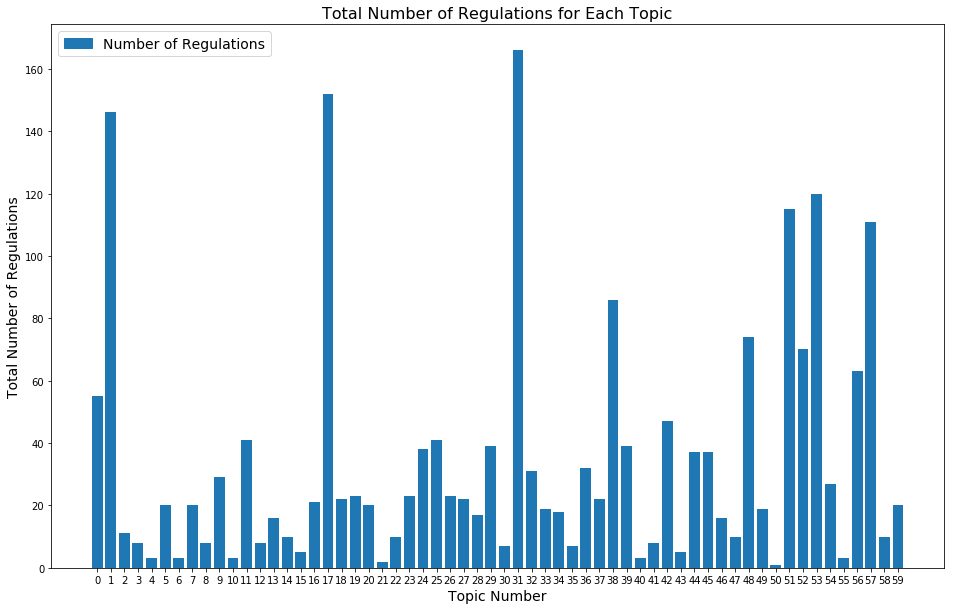

In [25]:
import matplotlib.patches as mpatches
# set up figure size
plt.figure(figsize=(16,10))
# bar chart of the number of regulations in each topic
plt.bar(regulation_topic_count.keys(),regulation_topic_count.values(),color="#1f77b4")
# plot custom legend
blue_patch = mpatches.Patch(color='#1f77b4', label='Number of Regulations')
plt.legend(handles = [blue_patch],loc='upper left',prop={'size': 14})
# plot x ticks
plt.xticks(topic_sorted)
# plot x label
plt.xlabel("Topic Number",size='14')
# plot y label
plt.ylabel("Total Number of Regulations",size='14')
# plot title
plt.title('Total Number of Regulations for Each Topic',size = 16)
# save the graph
plt.savefig('1.png')

In [26]:
# get the registered year of each regulation
year_list =[]
for i in range (len(reg_list)):
    year_list.append(reg_list[i]["registrationyear"])

In [27]:
# create dataframe of the year and topic each regulation belong to 
year_topic = {'Year':year_list,"Topic":regulation_topic}
year_topic_db = pd.DataFrame(year_topic)
# drop rows with NA years
year_topic_db = year_topic_db[year_topic_db['Year']!='NA']
# convert Year column to integers
year_topic_db['Year'] = year_topic_db['Year'].astype(int)
# select rows with year > = 2009 
year_topic_db = year_topic_db[year_topic_db['Year'] >=2009]
# create cross tab to see topic in each year
topic_each_year = pd.crosstab(year_topic_db['Topic'], year_topic_db['Year'])

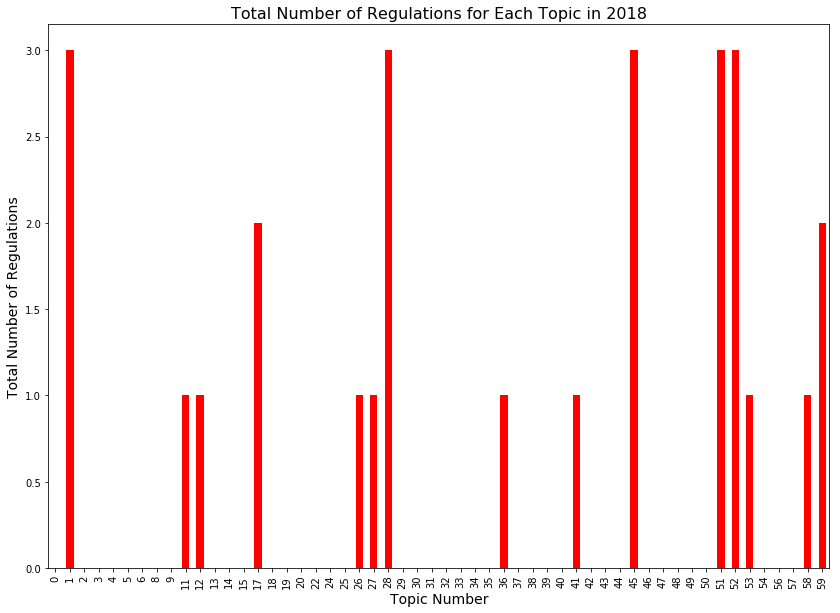

In [28]:
# plot bar graph of regulation topic trend of a specific year
topic_each_year.iloc[:,9].plot(kind='bar',figsize=(14,10),color='red')
# plot xlabel
plt.xlabel("Topic Number",size='14')
# plot y label
plt.ylabel("Total Number of Regulations",size='14')
# plot title
plt.title('Total Number of Regulations for Each Topic in 2018',size = 16)
# save graph
plt.savefig('10.png')
# show graph
plt.show()

In [29]:
# sort descending the words with probabilities belong to the specific topic number
topic_number = 28
temp1 =lda2.components_[topic_number]
sorted_array = np.sort(temp1)
reverse_array=sorted_array[::-1]

In [30]:
# find out the probability of each word in specific topic number
topic_frequence=dict()
i=0
# split the word wit comma
for words in topicword_full[topic_number].split(','):
    topic_frequence[words] = reverse_array[i]
    i=i+1

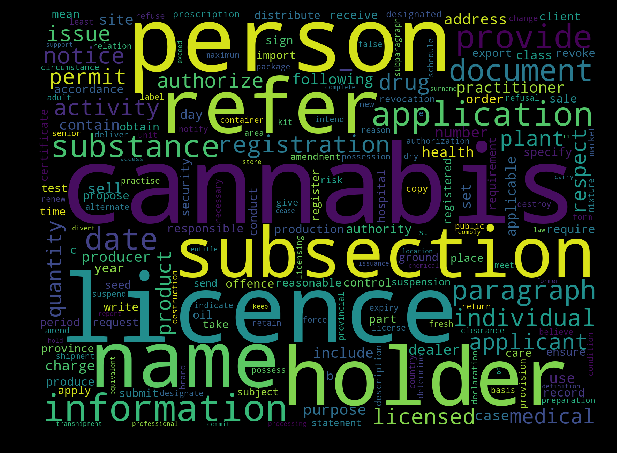

In [31]:
from wordcloud import WordCloud
# set up figure size and backgroup color black
plt.figure( figsize=(10,8),facecolor='k')
# create a word cloud graph by using the probabilities of each word in the topic
wc = WordCloud(width=1600, height=1200).generate_from_frequencies(topic_frequence)
# show word cloud
plt.imshow(wc)
# save word cloud with small border 
plt.savefig('6.png', facecolor='k', bbox_inches='tight')

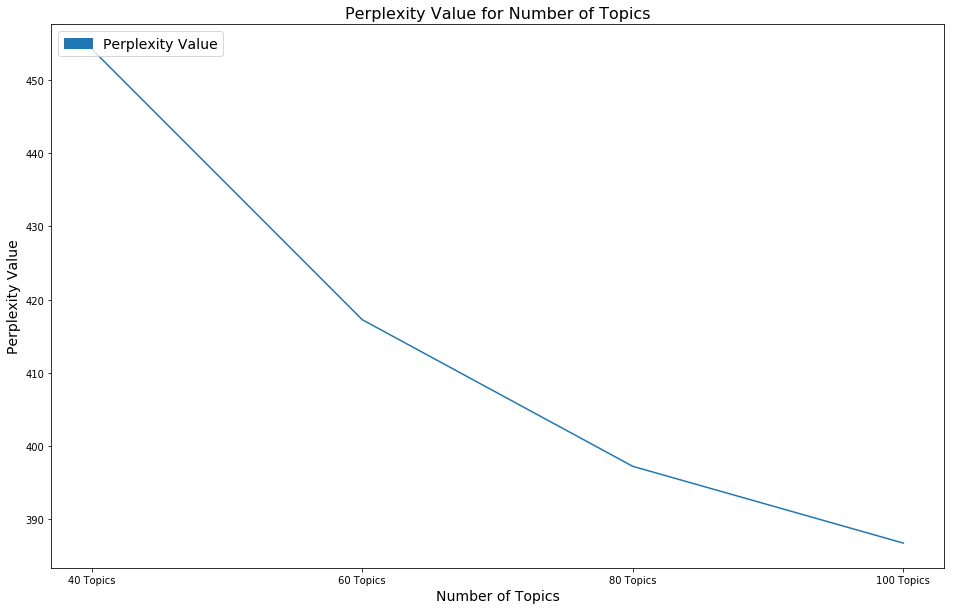

In [32]:
# Evaluation 

# create a dictionary for perplexity of different topics
perplexity_dict={'40 Topics':perplexity[0],'60 Topics':perplexity[1],'80 Topics':perplexity[2],'100 Topics':perplexity[3]}
# set up figure size
plt.figure(figsize=(16,10))
# plot by using keys and values in the perplexity_dict dictionary
plt.plot(perplexity_dict.keys(),perplexity_dict.values())
# create custom label for the graph
blue_patch = mpatches.Patch(color='#1f77b4', label='Perplexity Value')
plt.legend(handles = [blue_patch],loc='upper left',prop={'size': 14})
# plot x label
plt.xlabel("Number of Topics",size='14')
# plot y label
plt.ylabel("Perplexity Value",size='14')
# plot title
plt.title('Perplexity Value for Number of Topics',size = 16)
# save graph
plt.savefig('11.png')
# show graph
plt.show()

In [33]:
perplexity_dict

{'40 Topics': 454.2586578239946,
 '60 Topics': 417.2623389160646,
 '80 Topics': 397.22313937834093,
 '100 Topics': 386.73452711779817}

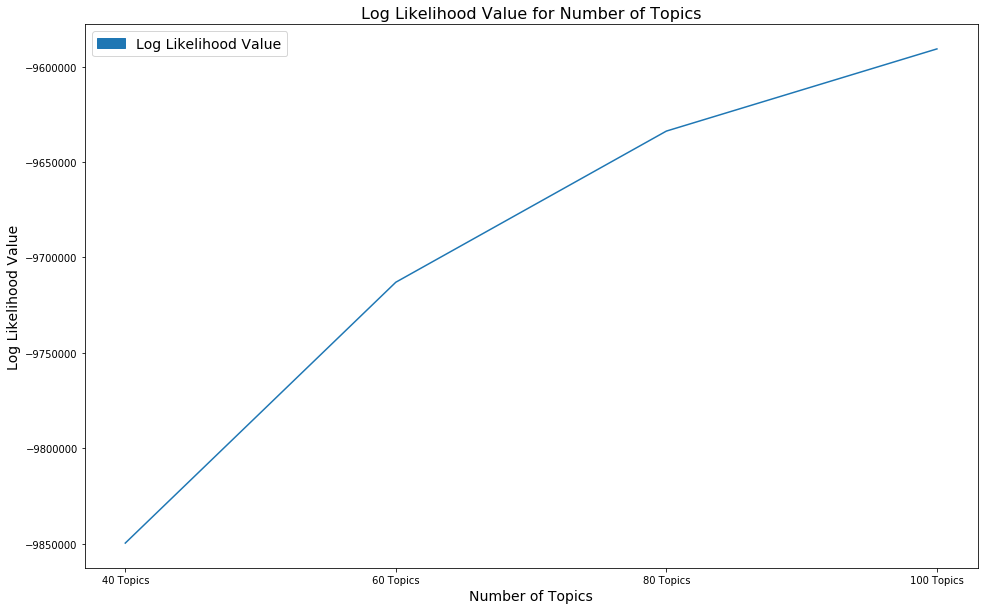

In [34]:
# create a dictionary for loglikelihood of different topics
log_likelihood_dict={'40 Topics':log_likelihood[0],'60 Topics':log_likelihood[1],'80 Topics':log_likelihood[2],'100 Topics':log_likelihood[3]}
# set up figure size
plt.figure(figsize=(16,10))
# plot by using keys and values in the log likelihood dictionary
plt.plot(log_likelihood_dict.keys(),log_likelihood_dict.values())
# create custom label for the graph
blue_patch = mpatches.Patch(color='#1f77b4', label='Log Likelihood Value')
plt.legend(handles = [blue_patch],loc='upper left',prop={'size': 14})
# plot xlabel
plt.xlabel("Number of Topics",size='14')
# plot y label
plt.ylabel("Log Likelihood Value",size='14')
# plot title
plt.title('Log Likelihood Value for Number of Topics',size = 16)
# save graph
plt.savefig('12.png')
# show graph
plt.show()